데이터 전처리

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
raw_game=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vgsales.csv의 사본')
raw_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
game=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vgsales.csv의 사본', usecols=[2,4,5,6,7,8,10])
game

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Wii,Sports,Nintendo,41.49,29.02,3.77,82.74
1,NES,Platform,Nintendo,29.08,3.58,6.81,40.24
2,Wii,Racing,Nintendo,15.85,12.88,3.79,35.82
3,Wii,Sports,Nintendo,15.75,11.01,3.28,33.00
4,GB,Role-Playing,Nintendo,11.27,8.89,10.22,31.37
...,...,...,...,...,...,...,...
16593,GBA,Platform,Kemco,0.01,0.00,0.00,0.01
16594,GC,Shooter,Infogrames,0.01,0.00,0.00,0.01
16595,PS2,Racing,Activision,0.00,0.00,0.00,0.01
16596,DS,Puzzle,7G//AMES,0.00,0.01,0.00,0.01


In [7]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      16598 non-null  object 
 1   Genre         16598 non-null  object 
 2   Publisher     16540 non-null  object 
 3   NA_Sales      16598 non-null  float64
 4   EU_Sales      16598 non-null  float64
 5   JP_Sales      16598 non-null  float64
 6   Global_Sales  16598 non-null  float64
dtypes: float64(4), object(3)
memory usage: 907.8+ KB


In [8]:
game.isna().sum()

,0
Platform,0
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Global_Sales,0


In [9]:
game=game.dropna()
game

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Wii,Sports,Nintendo,41.49,29.02,3.77,82.74
1,NES,Platform,Nintendo,29.08,3.58,6.81,40.24
2,Wii,Racing,Nintendo,15.85,12.88,3.79,35.82
3,Wii,Sports,Nintendo,15.75,11.01,3.28,33.00
4,GB,Role-Playing,Nintendo,11.27,8.89,10.22,31.37
...,...,...,...,...,...,...,...
16593,GBA,Platform,Kemco,0.01,0.00,0.00,0.01
16594,GC,Shooter,Infogrames,0.01,0.00,0.00,0.01
16595,PS2,Racing,Activision,0.00,0.00,0.00,0.01
16596,DS,Puzzle,7G//AMES,0.00,0.01,0.00,0.01


platforms_to_keep = ['X360', 'XOne', 'XB',  # Xbox 계열

                     'PS2', 'PS3', 'PS4', 'PS', 'PSP', 'PSV',  # PlayStation 계열
                     
                     'Wii', 'WiiU', 'GB', 'GBA', 'DS', '3DS', 'SNES', 'NES', 'N64', 'GC']   #Nintendo 계열

In [10]:
for i in game['Platform']:
    if i in ('X360', 'XOne', 'XB','Xbox'):
      game['Platform'].replace(i, 'Xbox', inplace=True)
    elif i in ('PS2', 'PS3', 'PS4', 'PS', 'PSP', 'PSV','PlayStation'):
      game['Platform'].replace(i, 'PlayStation', inplace=True)
    elif i in ('Wii', 'WiiU', 'GB', 'GBA', 'DS', '3DS', 'SNES', 'NES', 'N64', 'GC','Nintendo'):
      game['Platform'].replace(i, 'Nintendo', inplace=True)
    else:
      game['Platform'].replace(i, 'Other', inplace=True)

game

<ipython-input-10-32c4a9ed7707>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  game['Platform'].replace(i, 'Nintendo', inplace=True)
<ipython-input-10-32c4a9ed7707>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game['Platform'].replace(i, 'Nintendo', inplace=True)
<ipython-input-10-32c4a9ed7707>:3: FutureWarning: A value is trying to be s

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Nintendo,Sports,Nintendo,41.49,29.02,3.77,82.74
1,Nintendo,Platform,Nintendo,29.08,3.58,6.81,40.24
2,Nintendo,Racing,Nintendo,15.85,12.88,3.79,35.82
3,Nintendo,Sports,Nintendo,15.75,11.01,3.28,33.00
4,Nintendo,Role-Playing,Nintendo,11.27,8.89,10.22,31.37
...,...,...,...,...,...,...,...
16593,Nintendo,Platform,Kemco,0.01,0.00,0.00,0.01
16594,Nintendo,Shooter,Infogrames,0.01,0.00,0.00,0.01
16595,PlayStation,Racing,Activision,0.00,0.00,0.00,0.01
16596,Nintendo,Puzzle,7G//AMES,0.00,0.01,0.00,0.01


In [11]:
game.value_counts('Platform')

,count
Platform,
PlayStation,6636
Nintendo,6236
Xbox,2298
Other,1370


In [13]:
for i in game.columns:
    print(i,game[i].unique())

Platform ['Nintendo' 'Xbox' 'PlayStation' 'Other']
Genre ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
Publisher ['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'Eidos Interactive' 'RedOctane' 'Vivendi Games'
 'Enix Corporation' 'Namco Bandai Games' 'Palcom' 'Hasbro Interactive'
 'THQ' 'Fox Interactive' 'Acclaim Entertainment' 'MTV Games'
 'Disney Interactive Studios' 'Majesco Entertainment' 'Codemasters'
 'Red Orb' 'Level 5' 'Arena Entertainment' 'Midway Games' 'JVC'
 'Deep Silver' '989 Studios' 'NCSoft' 'UEP Systems' 'Parker Bros.' 'Maxis'
 'Imagic' 'Te

In [14]:
game[game['Publisher'] == 'Unknown']['Publisher'].value_counts()

,count
Publisher,
Unknown,203


In [15]:
game.drop(game[game['Publisher'] == 'Unknown'].index, inplace=True)
game

<ipython-input-15-ab92d52aaeab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game.drop(game[game['Publisher'] == 'Unknown'].index, inplace=True)


,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Nintendo,Sports,Nintendo,41.49,29.02,3.77,82.74
1,Nintendo,Platform,Nintendo,29.08,3.58,6.81,40.24
2,Nintendo,Racing,Nintendo,15.85,12.88,3.79,35.82
3,Nintendo,Sports,Nintendo,15.75,11.01,3.28,33.00
4,Nintendo,Role-Playing,Nintendo,11.27,8.89,10.22,31.37
...,...,...,...,...,...,...,...
16593,Nintendo,Platform,Kemco,0.01,0.00,0.00,0.01
16594,Nintendo,Shooter,Infogrames,0.01,0.00,0.00,0.01
16595,PlayStation,Racing,Activision,0.00,0.00,0.00,0.01
16596,Nintendo,Puzzle,7G//AMES,0.00,0.01,0.00,0.01


In [16]:
publisher_count = game['Publisher'].value_counts()
popular_publisher = publisher_count[publisher_count > 15].index
game_df = game[game['Publisher'].isin(popular_publisher)]
game_df

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Nintendo,Sports,Nintendo,41.49,29.02,3.77,82.74
1,Nintendo,Platform,Nintendo,29.08,3.58,6.81,40.24
2,Nintendo,Racing,Nintendo,15.85,12.88,3.79,35.82
3,Nintendo,Sports,Nintendo,15.75,11.01,3.28,33.00
4,Nintendo,Role-Playing,Nintendo,11.27,8.89,10.22,31.37
...,...,...,...,...,...,...,...
16591,Other,Adventure,Ubisoft,0.01,0.00,0.00,0.01
16592,Nintendo,Simulation,Destineer,0.01,0.00,0.00,0.01
16593,Nintendo,Platform,Kemco,0.01,0.00,0.00,0.01
16594,Nintendo,Shooter,Infogrames,0.01,0.00,0.00,0.01


In [17]:
game_df.value_counts('Publisher')

,count
Publisher,
Electronic Arts,1351
Activision,975
Namco Bandai Games,932
Ubisoft,921
Konami Digital Entertainment,832
...,...
GSP,16
Hasbro Interactive,16
UFO Interactive,16


In [19]:
!pip install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 51.7 MB/s eta 0:00:00


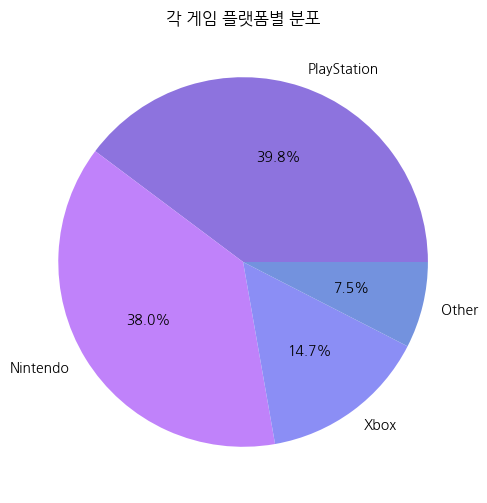

In [20]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

color=['#8D73DE','#C082FA','#8B8EF5','#7392DE']

plt.figure(figsize=(10, 6))
plt.pie(game_df['Platform'].value_counts(), labels=game_df['Platform'].value_counts().index, autopct='%1.1f%%', colors=color)
plt.title('각 게임 플랫폼별 분포')
plt.show()

In [33]:
publisher_count2 = game['Publisher'].value_counts()
popular_publisher2 = publisher_count2[publisher_count2 > 200].index
game_df2 = game[game['Publisher'].isin(popular_publisher2)]
game_df2

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Nintendo,Sports,Nintendo,41.49,29.02,3.77,82.74
1,Nintendo,Platform,Nintendo,29.08,3.58,6.81,40.24
2,Nintendo,Racing,Nintendo,15.85,12.88,3.79,35.82
3,Nintendo,Sports,Nintendo,15.75,11.01,3.28,33.00
4,Nintendo,Role-Playing,Nintendo,11.27,8.89,10.22,31.37
...,...,...,...,...,...,...,...
16569,Xbox,Shooter,Capcom,0.01,0.00,0.00,0.01
16575,PlayStation,Adventure,Tecmo Koei,0.00,0.00,0.01,0.01
16584,Nintendo,Puzzle,Ubisoft,0.01,0.00,0.00,0.01
16591,Other,Adventure,Ubisoft,0.01,0.00,0.00,0.01


In [32]:
grouped_df = game_df2.groupby(['Platform', 'Genre', 'Publisher'], as_index=False).agg({
    'NA_Sales': 'sum',
    'EU_Sales': 'sum',
    'JP_Sales': 'sum',
    'Global_Sales': 'sum'
})
grouped_df

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Nintendo,Action,Activision,34.05,13.14,0.21,51.16
1,Nintendo,Action,Atari,3.62,1.20,0.02,5.02
2,Nintendo,Action,Capcom,12.17,4.51,9.84,27.63
3,Nintendo,Action,Disney Interactive Studios,19.42,9.33,0.09,31.48
4,Nintendo,Action,Electronic Arts,13.97,8.49,0.26,24.23
...,...,...,...,...,...,...,...
552,Xbox,Strategy,Sega,0.20,0.05,0.00,0.28
553,Xbox,Strategy,Square Enix,0.23,0.10,0.00,0.35
554,Xbox,Strategy,THQ,0.57,0.17,0.00,0.78
555,Xbox,Strategy,Take-Two Interactive,1.09,0.45,0.00,1.67


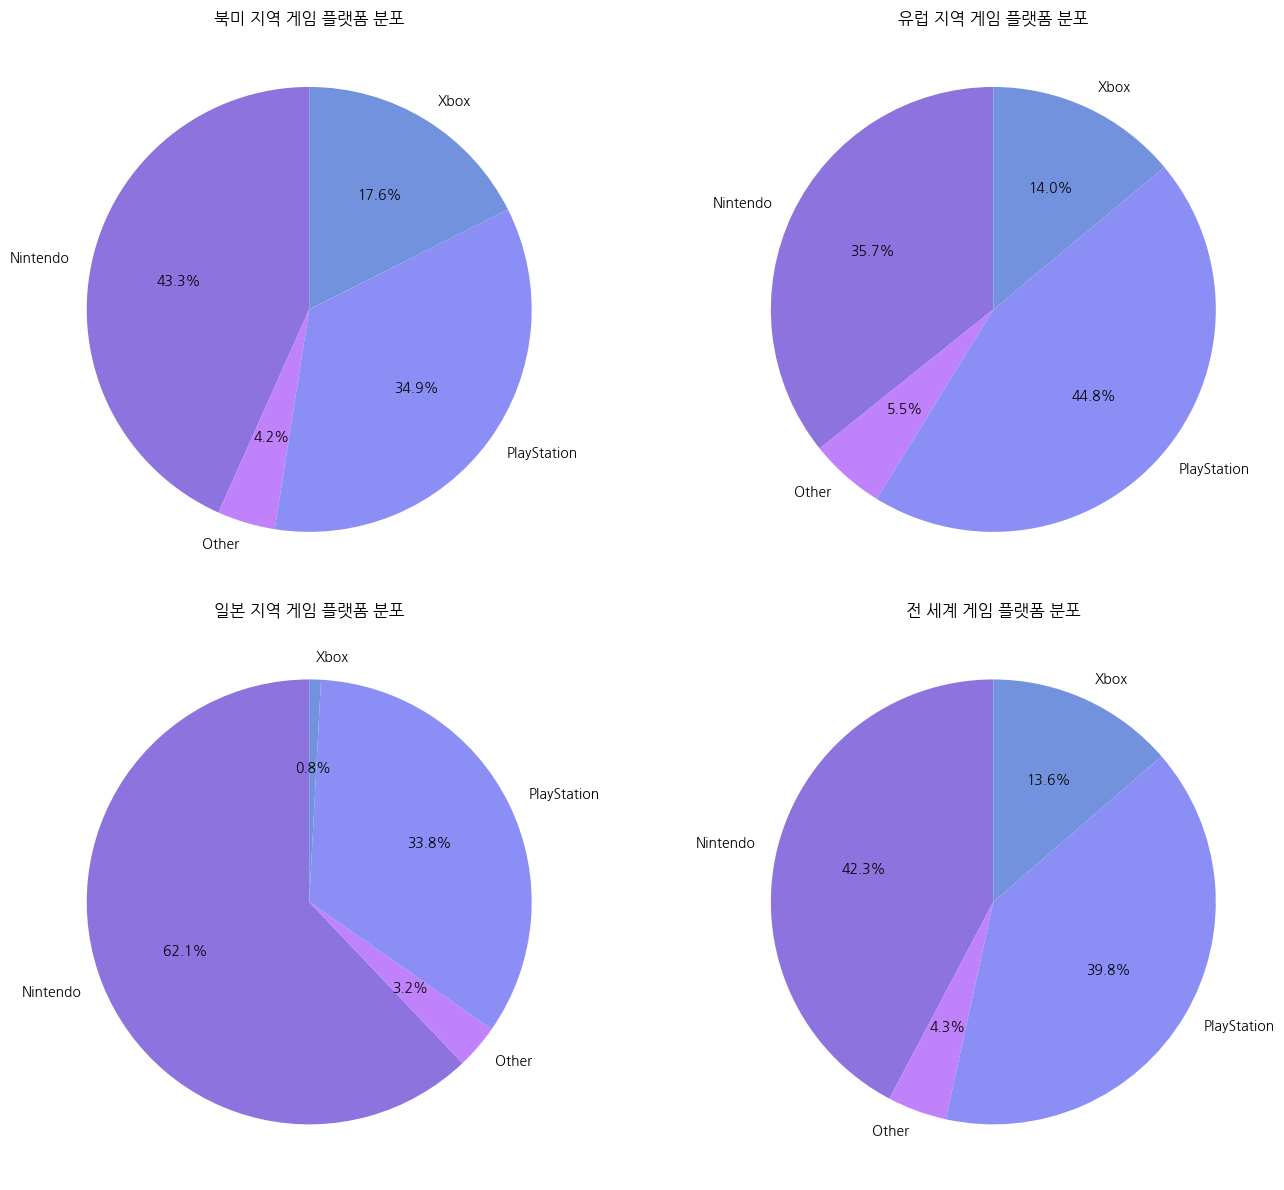

In [44]:
# 4개의 그래프를 2x2 배열로 그리기 위한 subplot 설정
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Platform별 NA_Sales 합계 계산
na_sales = grouped_df.groupby('Platform')['NA_Sales'].sum()

# Platform별 EU_Sales 합계 계산
eu_sales = grouped_df.groupby('Platform')['EU_Sales'].sum()

# Platform별 JP_Sales 합계 계산
jp_sales = grouped_df.groupby('Platform')['JP_Sales'].sum()

# Platform별 Global_Sales 합계 계산
global_sales = grouped_df.groupby('Platform')['Global_Sales'].sum()

# 첫 번째 원 그래프 (북미 지역)
axs[0, 0].pie(na_sales, autopct='%1.1f%%', startangle=90, colors=color, labels=na_sales.index)
axs[0, 0].set_title('북미 지역 게임 플랫폼 분포')
axs[0, 1].set_ylabel('')

# 두 번째 원 그래프 (EU 지역)
axs[0, 1].pie(eu_sales, autopct='%1.1f%%', startangle=90, colors=color, labels=eu_sales.index)
axs[0, 1].set_title('유럽 지역 게임 플랫폼 분포')
axs[0, 1].set_ylabel('')

# 세 번째 원 그래프 (JP 지역)
axs[1, 0].pie(jp_sales, autopct='%1.1f%%', startangle=90, colors=color, labels=jp_sales.index)
axs[1, 0].set_title('일본 지역 게임 플랫폼 분포')
axs[1, 0].set_ylabel('')

# 네 번째 원 그래프 (Global 지역)
axs[1, 1].pie(global_sales, autopct='%1.1f%%', startangle=90, colors=color, labels=global_sales.index)
axs[1, 1].set_title('전 세계 게임 플랫폼 분포')
axs[1, 1].set_ylabel('')

plt.tight_layout()
plt.show()

In [22]:
game_df2['Publisher'].value_counts()

,count
Publisher,
Electronic Arts,1351
Activision,975
Namco Bandai Games,932
Ubisoft,921
Konami Digital Entertainment,832
THQ,715
Nintendo,703
Sony Computer Entertainment,683
Sega,639


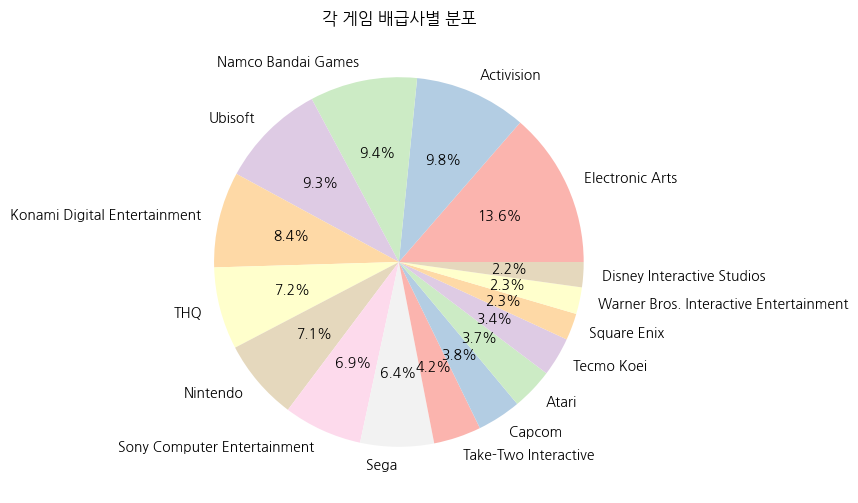

In [23]:
plt.figure(figsize=(10, 6))
plt.pie(game_df2['Publisher'].value_counts(), labels=game_df2['Publisher'].value_counts().index, autopct='%1.1f%%', colors=plt.cm.Pastel1.colors)
plt.title('각 게임 배급사별 분포')
plt.show()

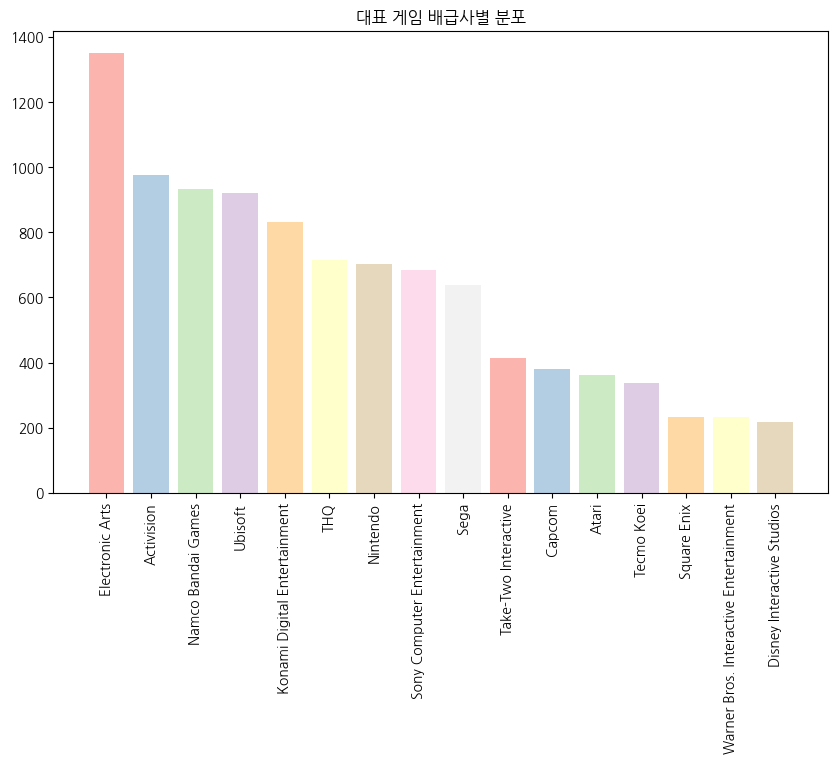

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(game_df2['Publisher'].value_counts().index, game_df2['Publisher'].value_counts(), color=plt.cm.Pastel1.colors)
plt.xticks(game_df2['Publisher'].value_counts().index,rotation=90)
plt.title('대표 게임 배급사별 분포')
plt.show()

feature/target 분리

In [ ]:
target_sr=game_df['Platform']
feature_df=game_df.drop('Platform',axis=1)

인코딩
- feature: 원 핫 인코딩
- target: 라벨 인코딩

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [ ]:
label=LabelEncoder()
target_label=label.fit_transform(target_sr)
target_label

array([0, 0, 0, ..., 0, 0, 2])

In [ ]:
feature_ohe=pd.get_dummies(feature_df)
feature_ohe

,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,...,Publisher_Tomy Corporation,Publisher_UFO Interactive,Publisher_Ubisoft,Publisher_Universal Interactive,Publisher_Virgin Interactive,Publisher_Vivendi Games,Publisher_Warner Bros. Interactive Entertainment,Publisher_Zoo Digital Publishing,Publisher_Zoo Games,Publisher_Zushi Games
0,41.49,29.02,3.77,82.74,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,29.08,3.58,6.81,40.24,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,15.85,12.88,3.79,35.82,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,15.75,11.01,3.28,33.00,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,11.27,8.89,10.22,31.37,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16591,0.01,0.00,0.00,0.01,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
16592,0.01,0.00,0.00,0.01,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16593,0.01,0.00,0.00,0.01,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
16594,0.01,0.00,0.00,0.01,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


학습용 데이터 셋 준비

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(feature_ohe,target_label,test_size=0.2,random_state=0,stratify=target_sr)

스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

ss=StandardScaler()
ss.fit(x_train)

mm=MinMaxScaler()
mm.fit(x_train)

rs=RobustScaler()
rs.fit(x_train)

ss_scaled_train=ss.transform(x_train)
ss_scaled_test=ss.transform(x_test)

mm_scaled_train=mm.transform(x_train)
mm_scaled_test=mm.transform(x_test)

rs_scaled_train=rs.transform(x_train)
rs_scaled_test=rs.transform(x_test)


학습 진행: 로지스틱 회귀

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()
lr.fit(ss_scaled_train,y_train)
lr.fit(mm_scaled_train,y_train)
lr.fit(rs_scaled_train,y_train)

c:\Users\desktop\anaconda3\envs\ML_38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\desktop\anaconda3\envs\ML_38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

LogisticRegression()

In [ ]:
ss_train_score=lr.score(ss_scaled_train,y_train)
mm_train_score=lr.score(mm_scaled_train,y_train)
rs_train_score=lr.score(rs_scaled_train,y_train)

print('StandardScaler Score:',{ss_train_score})
print('MinMaxScaler Score:',{mm_train_score})
print('RobustScaler Score:',{rs_train_score})

StandardScaler Score: {0.5065178495356565}
MinMaxScaler Score: {0.49424895629206783}
RobustScaler Score: {0.6320184033398654}


로버스트 스케일러 사용

In [ ]:
rs_train_score=lr.score(rs_scaled_train,y_train)
rs_test_score=lr.score(rs_scaled_test,y_test)

print(f'train_score: {rs_train_score}, test_score: {rs_test_score}')

train_score: 0.6320184033398654, test_score: 0.6194207836456559


In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score

In [ ]:
lr_pred=lr.predict(rs_scaled_test)
lr_pred_proba=lr.predict_proba(rs_scaled_test)

In [ ]:
print('accuracy:{0:.3f},roc_auc:{1:.3f}'.format(accuracy_score(y_test,lr_pred),
                                                roc_auc_score(y_test,lr_pred_proba,multi_class='ovr')))

accuracy:0.619,roc_auc:0.821


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
confusion_matrix(y_test, lr_pred)

array([[805,  17, 251,  43],
       [ 70,  47,  78,  26],
       [233,  16, 866,  52],
       [168,  17, 146, 100]], dtype=int64)

In [ ]:
class_report=classification_report(y_test, lr_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.63      0.72      0.67      1116
           1       0.48      0.21      0.30       221
           2       0.65      0.74      0.69      1167
           3       0.45      0.23      0.31       431

    accuracy                           0.62      2935
   macro avg       0.55      0.48      0.49      2935
weighted avg       0.60      0.62      0.60      2935



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params={'penalty':['l2','l1'],
        'C':[295,296,297,298,299],
        'solver':['lbfgs','liblinear','newton-cg','sag','saga'],
        'multi_class':['ovr','auto','multinomial']}

lr_clf=LogisticRegression()

grid_clf=GridSearchCV(lr_clf,param_grid=params,scoring='accuracy',cv=3)
grid_clf.fit(rs_scaled_train,y_train)
print('최적 하이퍼 파라미터: {0}, 최적 평균 정확도: {1:.3f}'.format(grid_clf.best_params_,
                                                                grid_clf.best_score_))

c:\Users\desktop\anaconda3\envs\ML_38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\desktop\anaconda3\envs\ML_38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

최적 하이퍼 파라미터: {'C': 295, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}, 최적 평균 정확도: 0.626


In [ ]:
lr2=LogisticRegression(C=295,penalty='l2',solver='newton-cg',multi_class='auto')
lr2.fit(rs_scaled_train,y_train)

train_score=lr2.score(rs_scaled_train,y_train)
test_score=lr2.score(rs_scaled_test,y_test)

print(f'train_score: {train_score}, test_score: {test_score}')

train_score: 0.638919655789384, test_score: 0.6265758091993185


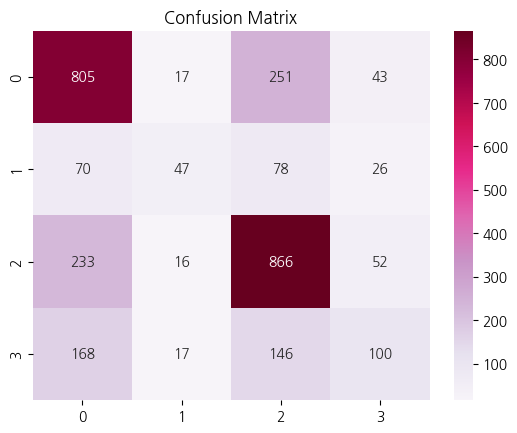

              precision    recall  f1-score   support

           0       0.63      0.72      0.67      1116
           1       0.48      0.21      0.30       221
           2       0.65      0.74      0.69      1167
           3       0.45      0.23      0.31       431

    accuracy                           0.62      2935
   macro avg       0.55      0.48      0.49      2935
weighted avg       0.60      0.62      0.60      2935



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm=confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap='PuRd')
plt.title("Confusion Matrix")
plt.show()

class_report=classification_report(y_test, lr_pred)
print(class_report)